In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.applications import vgg16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import os
import pathlib

In [2]:
batch = 16

In [3]:
train_path = '/content/drive/MyDrive/CNN Practice Datasets/Food Classification/Training dataset'
test_path = '/content/drive/MyDrive/CNN Practice Datasets/Food Classification/Testing dataset'

In [4]:
data_dir = pathlib.Path(train_path)

In [5]:
class_names = np.array([item.name for item in data_dir.glob('*')])
class_names

array(['steak', 'cookies', 'burgers', 'hotdogs', 'toast', 'pizza',
       'donuts', 'frenchfries', 'friedchicken', 'friedegg'], dtype='<U12')

In [6]:
train_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2).flow_from_directory(train_path,batch_size=batch,\
                                                                                        class_mode='sparse',\
                                                                                        target_size=(224, 224),\
                                                                                        classes=list(class_names),\
                                                                                        shuffle=True,\
                                                                                        subset='training')

Found 399 images belonging to 10 classes.


In [7]:
val_gen = ImageDataGenerator(rescale=1./255,validation_split=0.2).flow_from_directory(train_path,batch_size=batch,\
                                                                                        class_mode='sparse',\
                                                                                      target_size=(224, 224),\
                                                                                        classes=list(class_names),\
                                                                                        shuffle=True,\
                                                                                        subset='validation')

Found 96 images belonging to 10 classes.


In [8]:
transf_model = vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58900480/58889256 [==============================] - 0s 0us/step


In [9]:
model = Flatten()(transf_model.output)

In [10]:
output = Dense(10,activation='softmax')(model)

In [11]:
model = Model(inputs=transf_model.input,outputs = output)

In [12]:
for layer in transf_model.layers:
  layer.trainable = False

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
checkpoint = ModelCheckpoint('vgg16_model.h5',save_best_only=True,verbose=1)

In [16]:
train_steps_per_epochs = np.ceil(train_gen.samples/batch)
val_steps_per_epochs = np.ceil(val_gen.samples/batch)

In [17]:
print(train_steps_per_epochs) # 399/16
print(val_steps_per_epochs) # 96/16

25.0
6.0


In [18]:
history = model.fit(train_gen,steps_per_epoch=train_steps_per_epochs,validation_data = val_gen,\
                              validation_steps = val_steps_per_epochs, epochs=5, verbose=1, callbacks=[checkpoint])

Epoch 1/5
25/25 [==============================] - ETA: 0s - loss: 2.1252 - accuracy: 0.4035
Epoch 1: val_loss improved from inf to 0.98979, saving model to vgg16_model.h5
25/25 [==============================] - 270s 11s/step - loss: 2.1252 - accuracy: 0.4035 - val_loss: 0.9898 - val_accuracy: 0.5938
Epoch 2/5
25/25 [==============================] - ETA: 0s - loss: 0.1795 - accuracy: 0.9499
Epoch 2: val_loss improved from 0.98979 to 0.65955, saving model to vgg16_model.h5
25/25 [==============================] - 256s 10s/step - loss: 0.1795 - accuracy: 0.9499 - val_loss: 0.6595 - val_accuracy: 0.7604
Epoch 3/5
25/25 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9975
Epoch 3: val_loss did not improve from 0.65955
25/25 [==============================] - 257s 10s/step - loss: 0.0390 - accuracy: 0.9975 - val_loss: 0.6684 - val_accuracy: 0.8229
Epoch 4/5
25/25 [==============================] - ETA: 0s - loss: 0.0175 - accuracy: 1.0000
Epoch 4: val_loss improved

In [19]:
model.load_weights("vgg16_model.h5")

In [20]:
evaluation = model.evaluate(val_gen) # steps per epoch

6/6 [==============================] - 57s 10s/step - loss: 0.5799 - accuracy: 0.7708


In [21]:
print("Val Loss:", evaluation[0])
print("Val Accuracy:", evaluation[1]*100)

Val Loss: 0.579863429069519
Val Accuracy: 77.08333134651184


In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

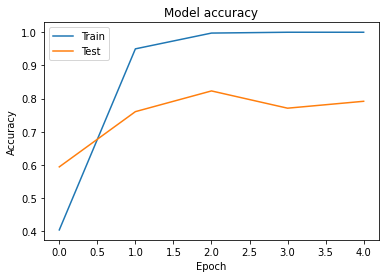

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

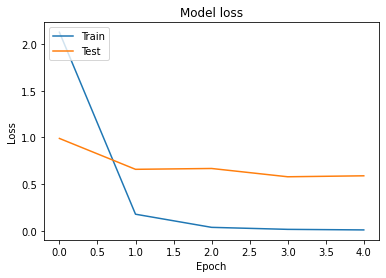

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()